## Notebook du projet *Python pour la Data Science*

Réalisé par:
- **ASKRI Aymane**

### Importer toutes les bibliothèques nécessaires.

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Compréhension des données

In [2]:
data_loc = r'data_csv\data.csv'
df = pd.read_csv(data_loc)

Explorer notre ensemble de données est essentiel pour obtenir des informations primordiales. Pour ce faire, nous utiliserons certaines fonctions de pandas pour mettre en évidence les propriétés clés au sein de l'ensemble de données.

In [3]:
# Afficher les 5 premières ligne de notre data
df.head()

n_paths  n_points  width  height  elongation  roundness      length  \
0        5       883    258     104    2.466667   0.701106  621.724587   
1        4       596    241      70    3.408451   0.583319  580.020937   
2        8       571    174     166    1.047904   0.883267  579.209087   
3        3       575    163     272    1.664634   0.821050  703.863135   
4        5       586    212     140    1.510638   0.824155  574.167315   

      area    class  
0  21566.0      car  
1  15616.5     fish  
2  23580.5    house  
3  32369.5     tree  
4  21621.0  bicycle

In [4]:
df.tail()

n_paths  n_points  width  height  elongation  roundness      length  \
5389        3       572    271     298    1.099265   0.862960  892.049033   
5390       10       703    236      89    2.633333   0.687958  565.407418   
5391       11       613    293      57    5.068966   0.441984  642.163428   
5392        8       990     24     211    8.480000   0.290142  450.218074   
5393        1       124    195     193    1.010309   0.970612  636.952912   

         area    class  
5389  54646.0     tree  
5390  17501.5  bicycle  
5391  14504.0   guitar  
5392   4680.0   pencil  
5393  31336.5    clock

In [5]:
df.describe()

n_paths      n_points        width       height   elongation  \
count  5394.000000   5394.000000  5394.000000  5394.000000  5394.000000   
mean     12.067668    698.391175   236.398406   206.879125     1.743221   
std      12.632522    672.326718    77.886114    80.837411     1.107965   
min       1.000000      4.000000     3.000000     5.000000     1.000000   
25%       5.000000    314.000000   186.000000   143.000000     1.144155   
50%       9.000000    512.000000   241.000000   201.000000     1.396607   
75%      15.000000    861.000000   292.000000   266.000000     1.925598   
max     216.000000  15162.000000   613.000000   474.000000    12.851852   

         roundness       length           area  
count  5394.000000  5394.000000    5394.000000  
mean      0.743528   725.205837   34377.972099  
std       0.177607   195.220089   21470.894676  
min       0.063023    12.073593       3.000000  
25%       0.658490   590.566696   18978.500000  
50%       0.793637   719.865813   30604.750000  
75%       0.864949   849.746702   45019.750000  
max       0.994455  1561.164396  164436.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5394 entries, 0 to 5393
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   n_paths     5394 non-null   int64  
 1   n_points    5394 non-null   int64  
 2   width       5394 non-null   int64  
 3   height      5394 non-null   int64  
 4   elongation  5394 non-null   float64
 5   roundness   5394 non-null   float64
 6   length      5394 non-null   float64
 7   area        5394 non-null   float64
 8   class       5394 non-null   object 
dtypes: float64(4), int64(4), object(1)
memory usage: 379.4+ KB


In [7]:
df.isnull().sum()

n_paths       0
n_points      0
width         0
height        0
elongation    0
roundness     0
length        0
area          0
class         0
dtype: int64

In [8]:
df.columns

Index(['n_paths', 'n_points', 'width', 'height', 'elongation', 'roundness',
       'length', 'area', 'class'],
      dtype='object')

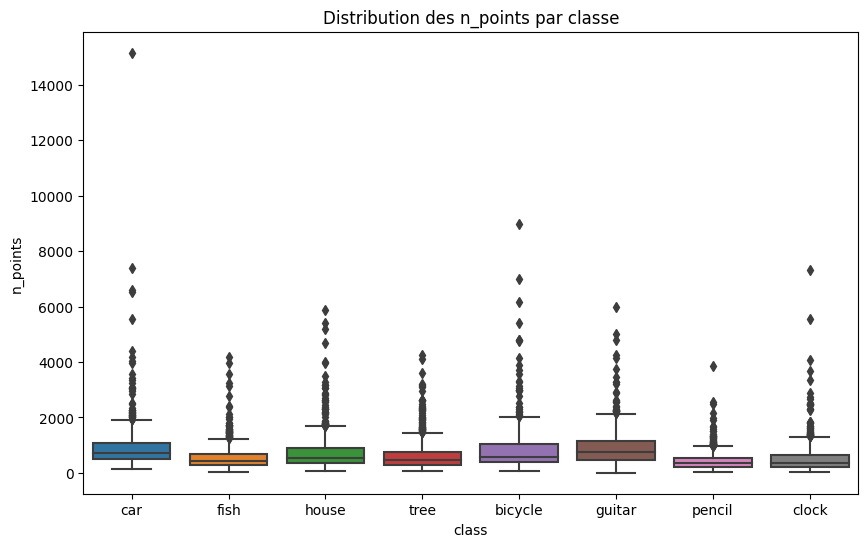

In [9]:
# Un diagramme représentant la distribution des n_points par classe en utilisant Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='n_points', data=df)
plt.title('Distribution des n_points par classe')
plt.show()


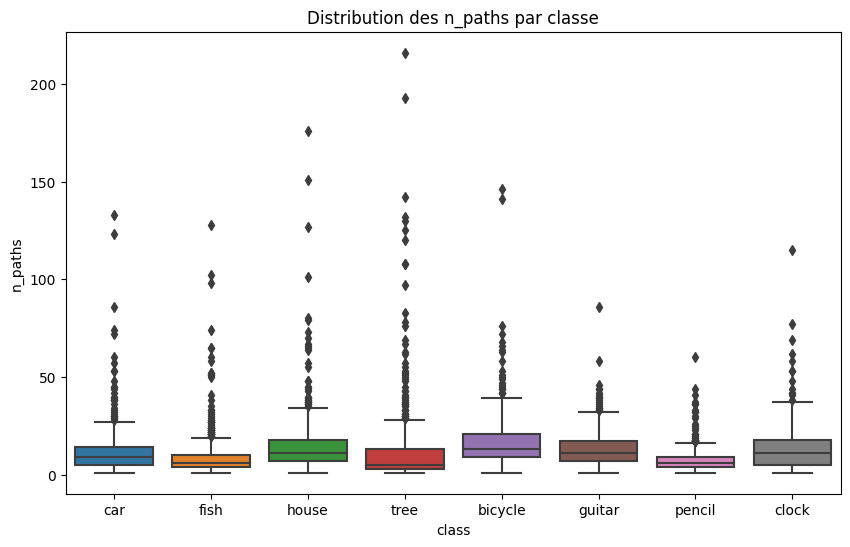

In [10]:
# Un diagramme représentant la distribution des n_paths par classe en utilisant Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='n_paths', data=df)
plt.title('Distribution des n_paths par classe')
plt.show()

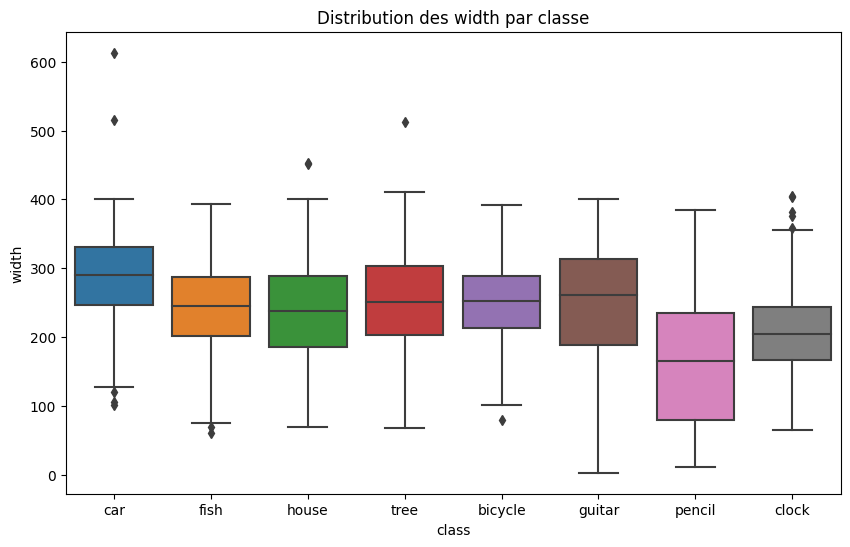

In [11]:
# Un diagramme représentant la distribution des width par classe en utilisant Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='width', data=df)
plt.title('Distribution des width par classe')
plt.show()

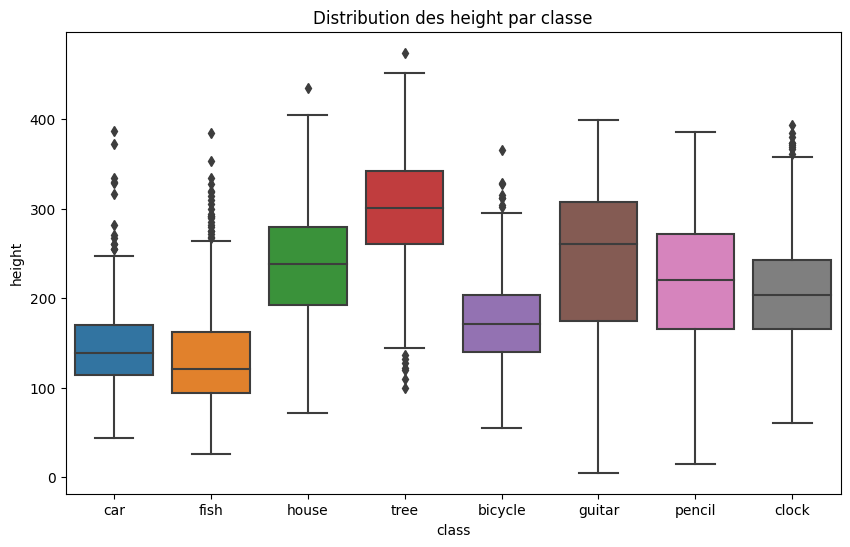

In [12]:
# Un diagramme représentant la distribution des height par classe en utilisant Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='height', data=df)
plt.title('Distribution des height par classe')
plt.show()

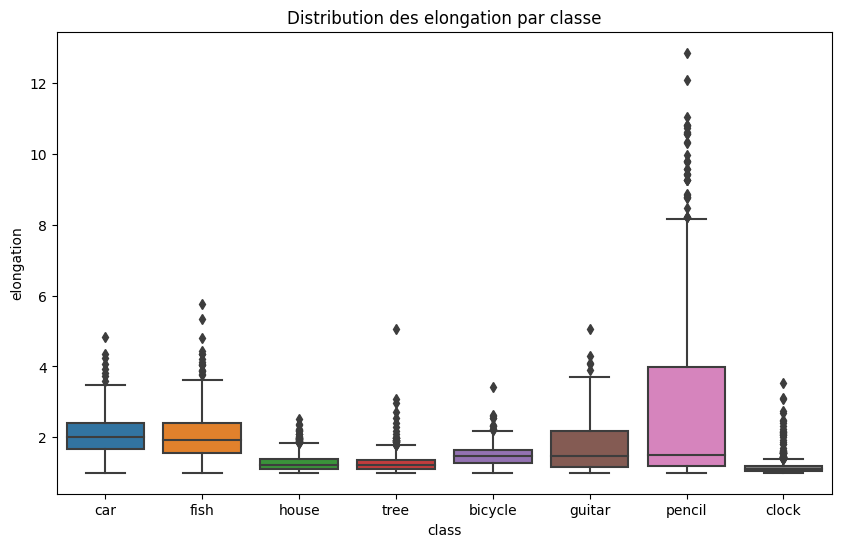

In [13]:
# Un diagramme représentant la distribution des elongation par classe en utilisant Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='elongation', data=df)
plt.title('Distribution des elongation par classe')
plt.show()

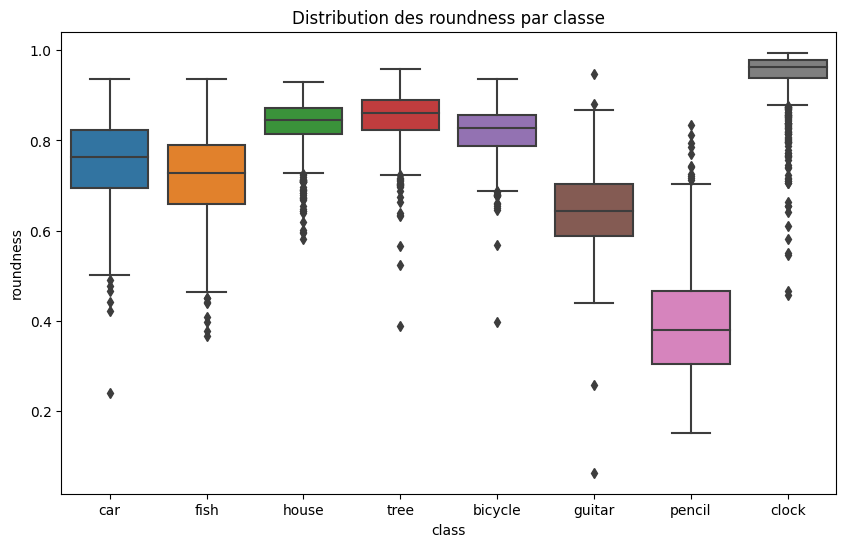

In [14]:
# Un diagramme représentant la distribution des roundness par classe en utilisant Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='roundness', data=df)
plt.title('Distribution des roundness par classe')
plt.show()

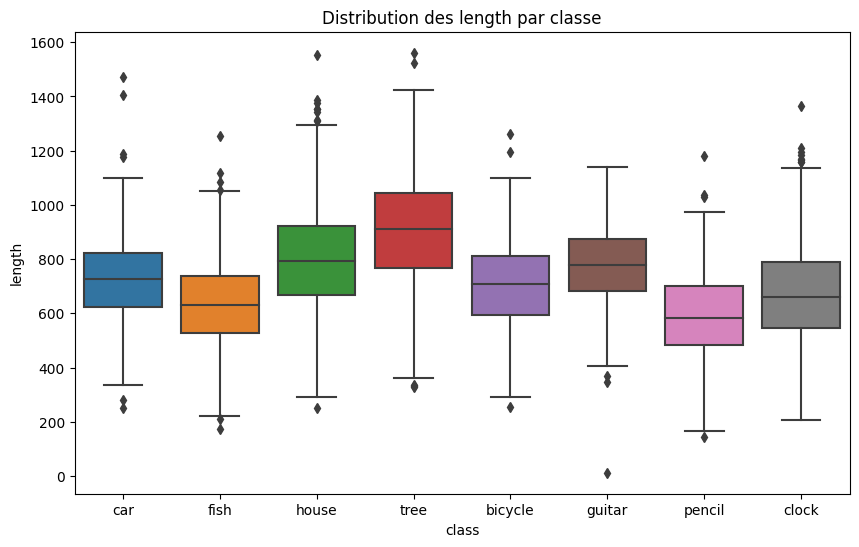

In [15]:
# Un diagramme représentant la distribution des lengths par classe en utilisant Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='length', data=df)
plt.title('Distribution des length par classe')
plt.show()

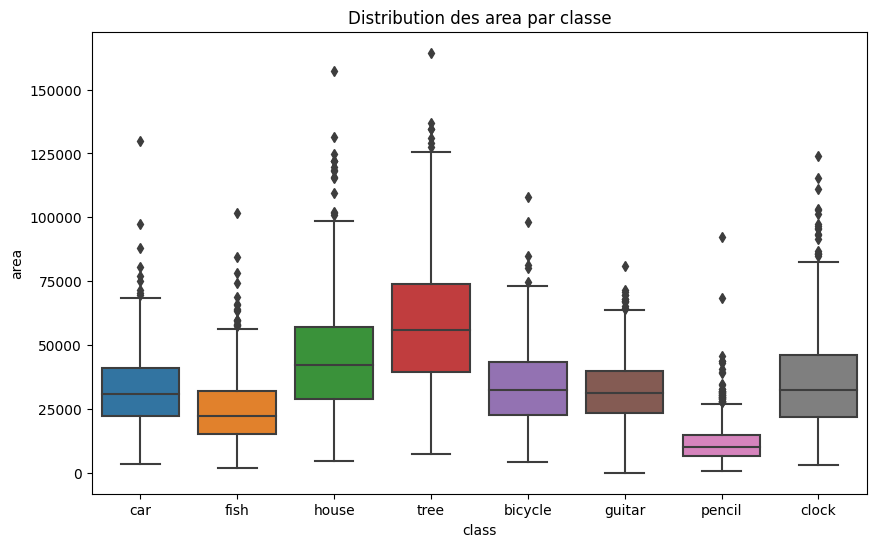

In [16]:
# Un diagramme représentant la distribution des areas par classe en utilisant Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='area', data=df)
plt.title('Distribution des area par classe')
plt.show()

C:\Users\Aymane\AppData\Local\Temp\ipykernel_13012\1037531975.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


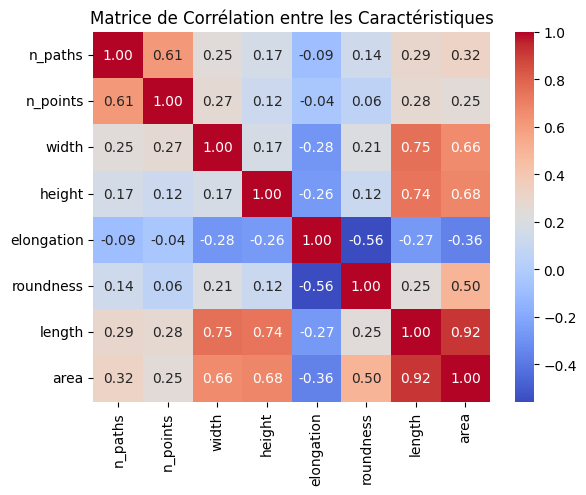

In [17]:
# Créer une matrice de corrélation avec Seaborn
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation entre les Caractéristiques')
plt.show()


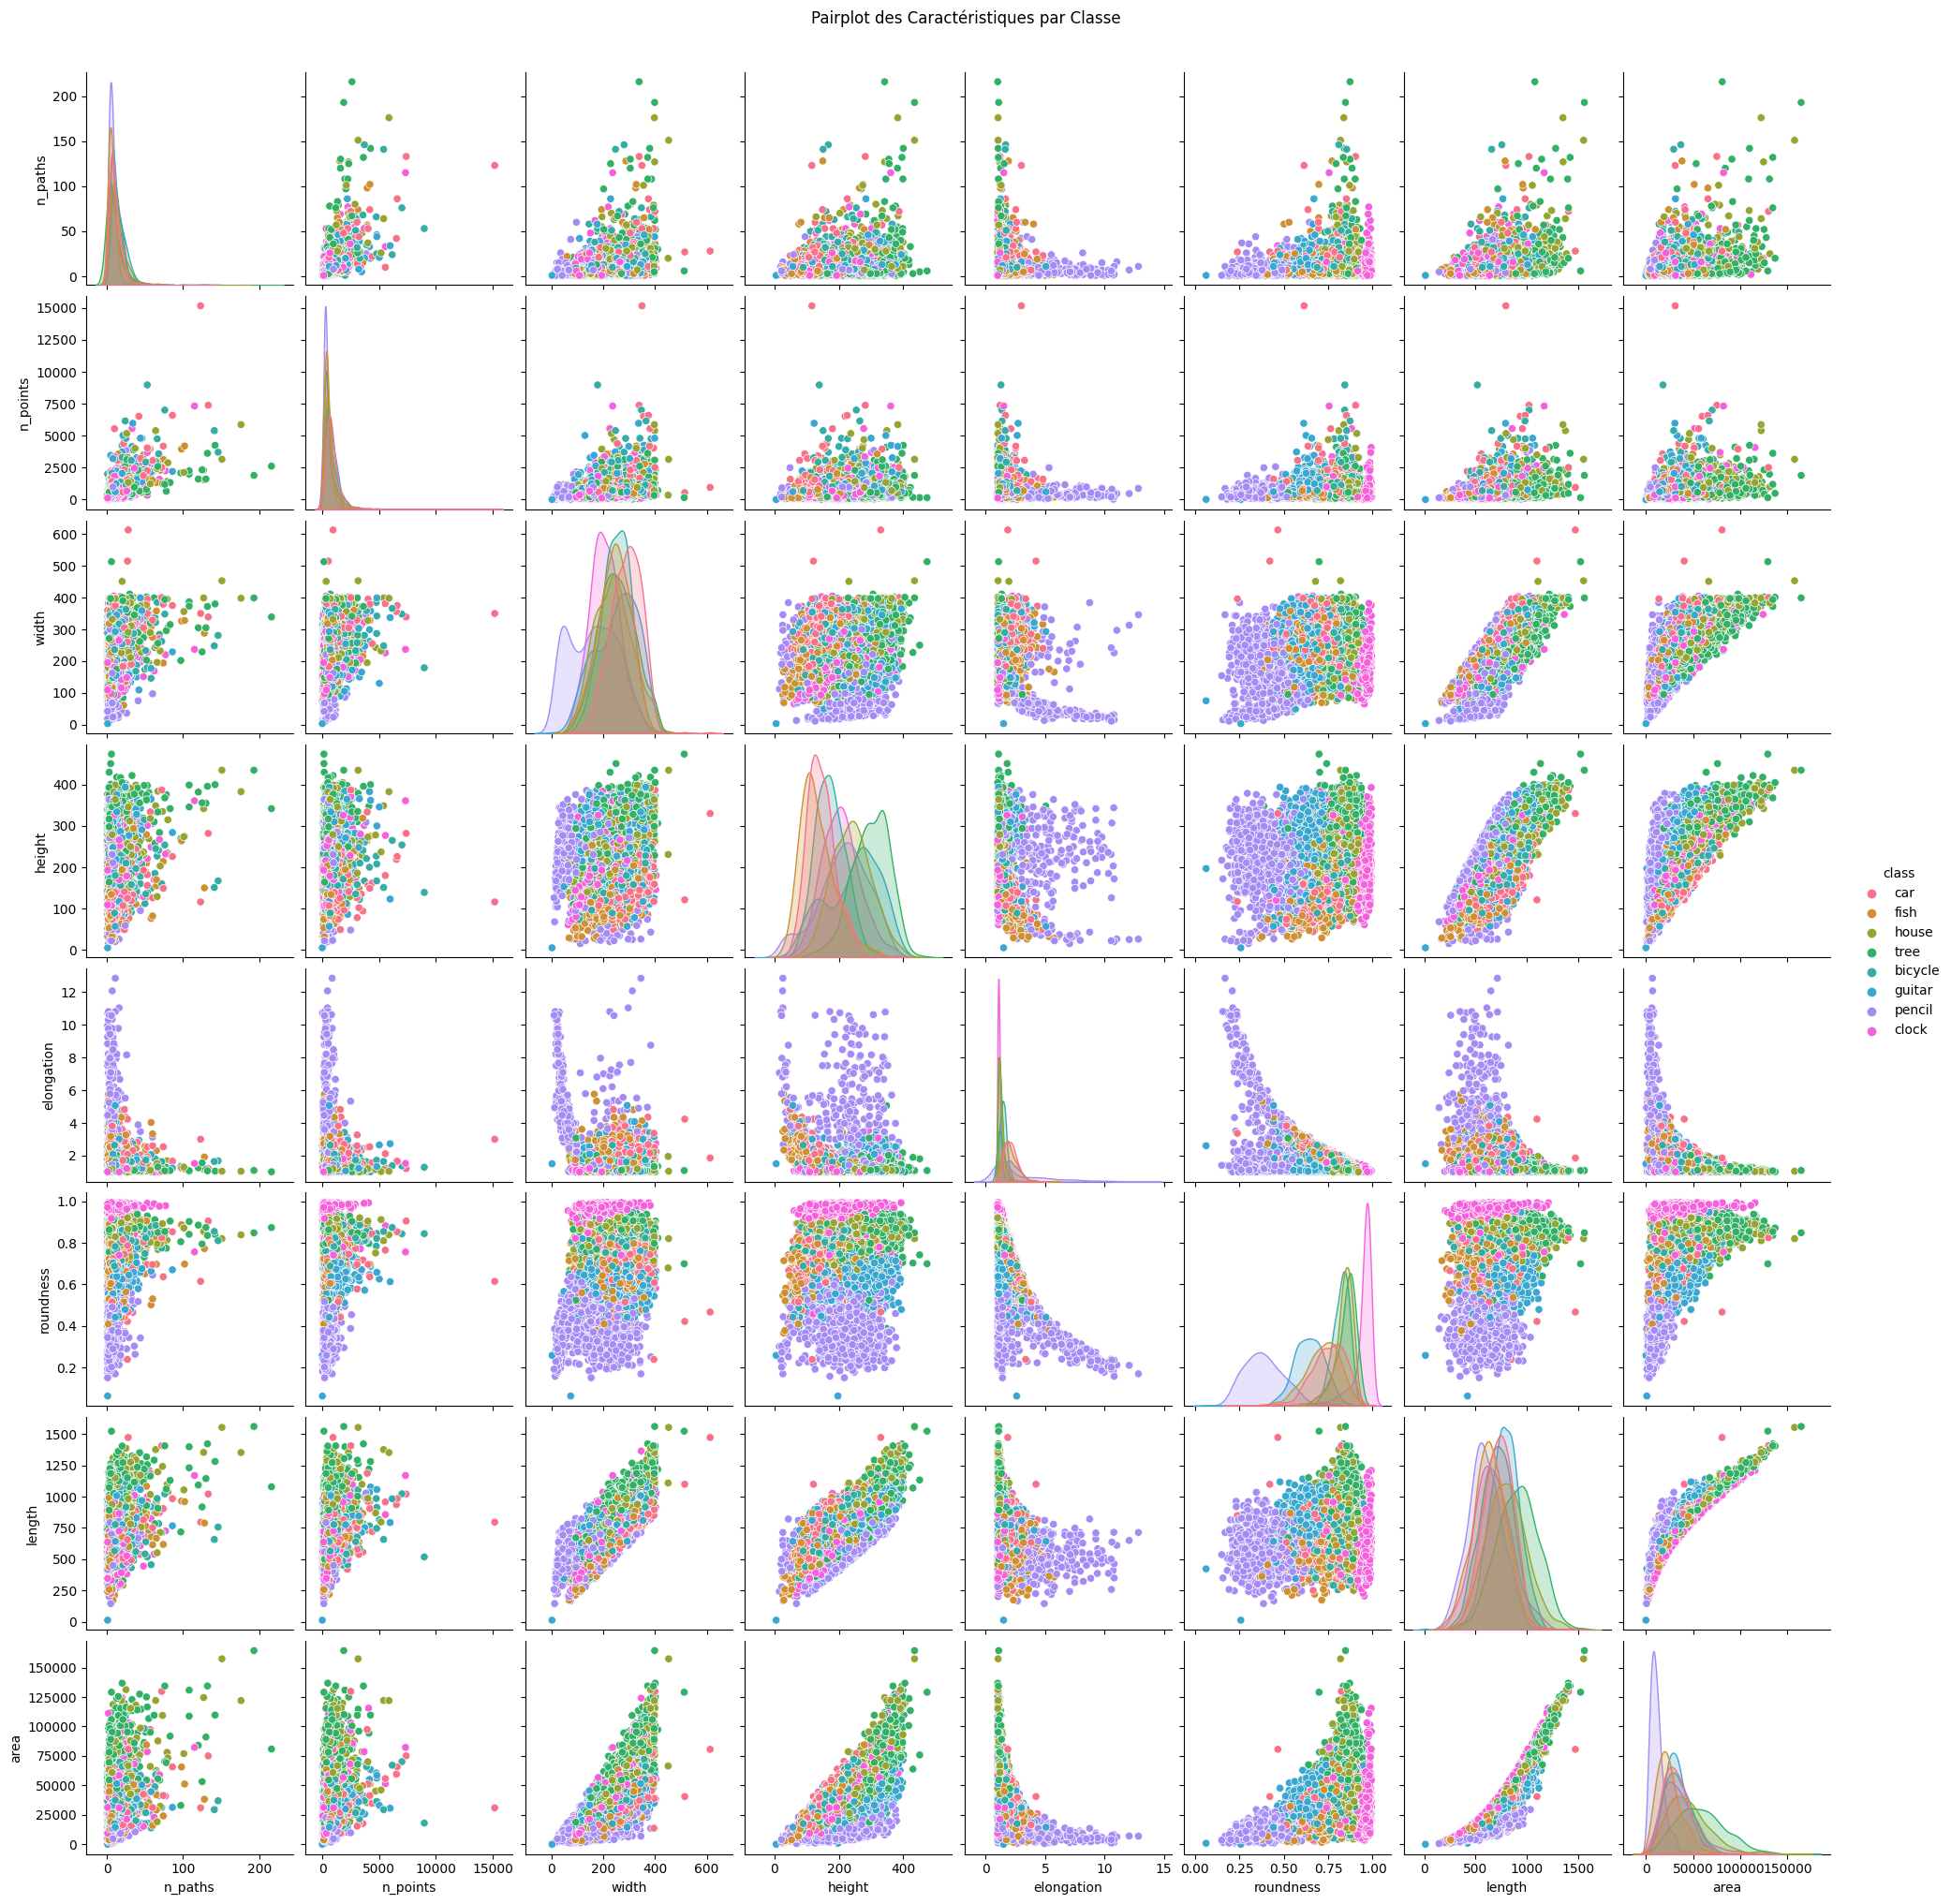

In [18]:
# Créer un pairplot avec Seaborn
sns.pairplot(df, hue='class', palette='husl')
plt.suptitle('Pairplot des Caractéristiques par Classe', y=1.02)
plt.show()


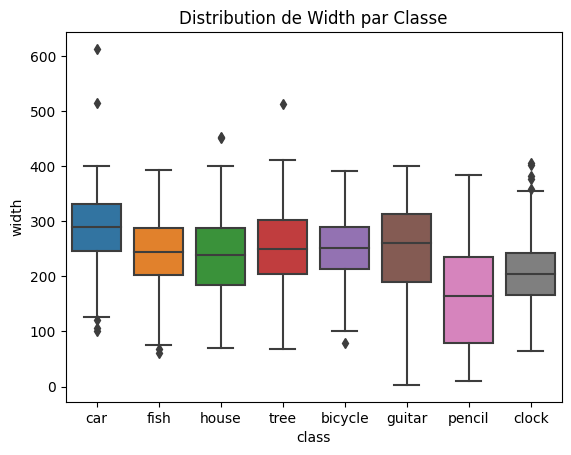

In [19]:
# Boîtes à moustaches par classe pour width
sns.boxplot(x='class', y='width', data=df)
plt.title('Distribution de Width par Classe')
plt.show()

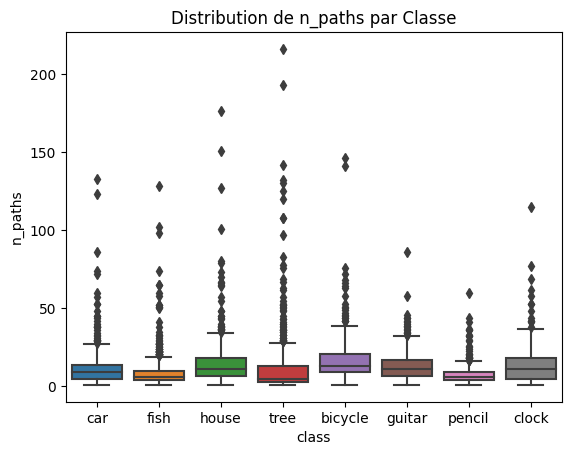

In [20]:
# Boîtes à moustaches par classe pour n_paths
sns.boxplot(x='class', y='n_paths', data=df)
plt.title('Distribution de n_paths par Classe')
plt.show()

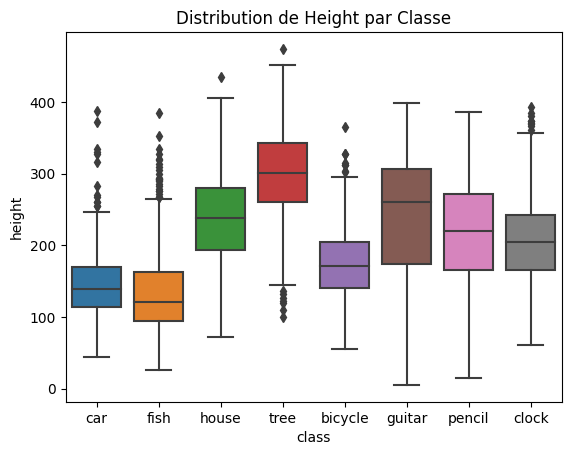

In [21]:
# Boîtes à moustaches par classe pour height
sns.boxplot(x='class', y='height', data=df)
plt.title('Distribution de Height par Classe')
plt.show()

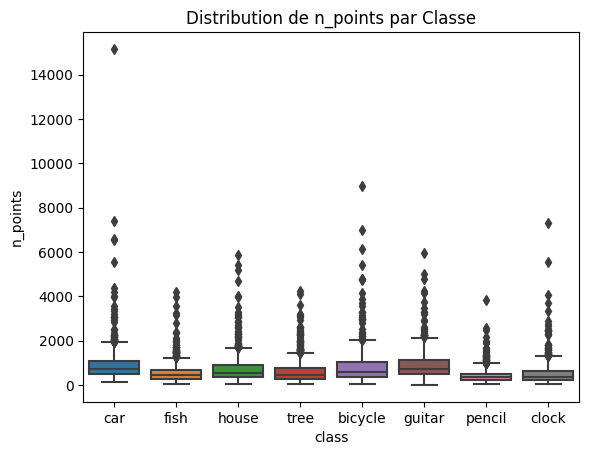

In [22]:
# Boîtes à moustaches par classe pour n_points
sns.boxplot(x='class', y='n_points', data=df)
plt.title('Distribution de n_points par Classe')
plt.show()

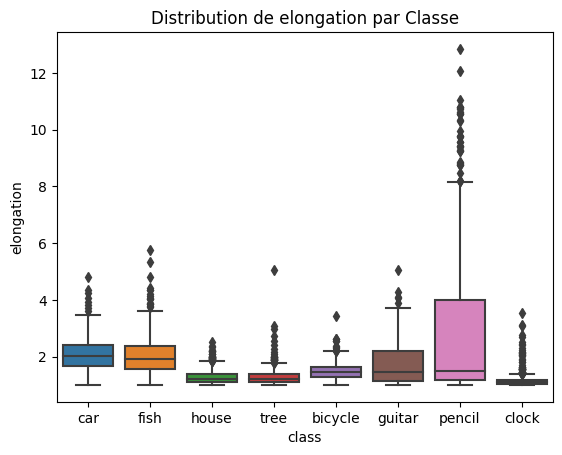

In [23]:
# Boîtes à moustaches par classe pour elongation
sns.boxplot(x='class', y='elongation', data=df)
plt.title('Distribution de elongation par Classe')
plt.show()

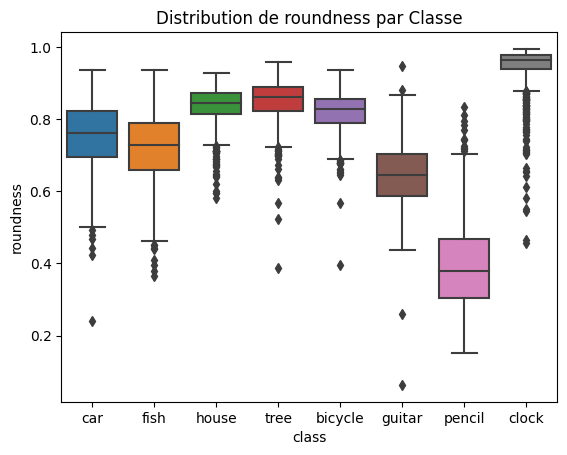

In [24]:
# Boîtes à moustaches par classe pour roundness
sns.boxplot(x='class', y='roundness', data=df)
plt.title('Distribution de roundness par Classe')
plt.show()

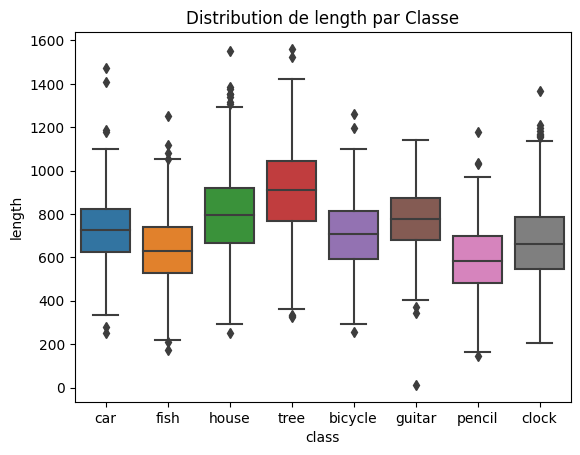

In [25]:
# Boîtes à moustaches par classe pour length
sns.boxplot(x='class', y='length', data=df)
plt.title('Distribution de length par Classe')
plt.show()

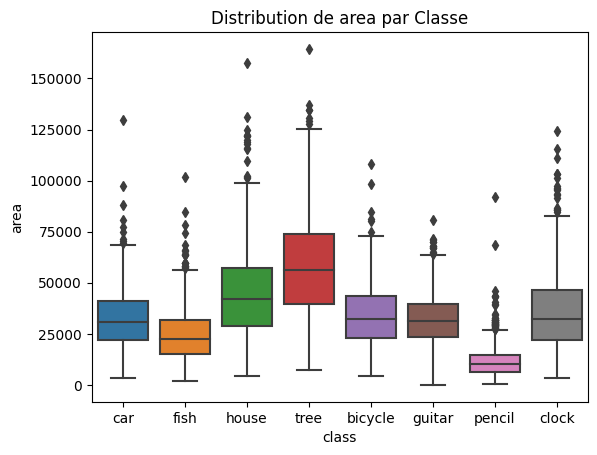

In [26]:
# Boîtes à moustaches par classe pour area
sns.boxplot(x='class', y='area', data=df)
plt.title('Distribution de area par Classe')
plt.show()

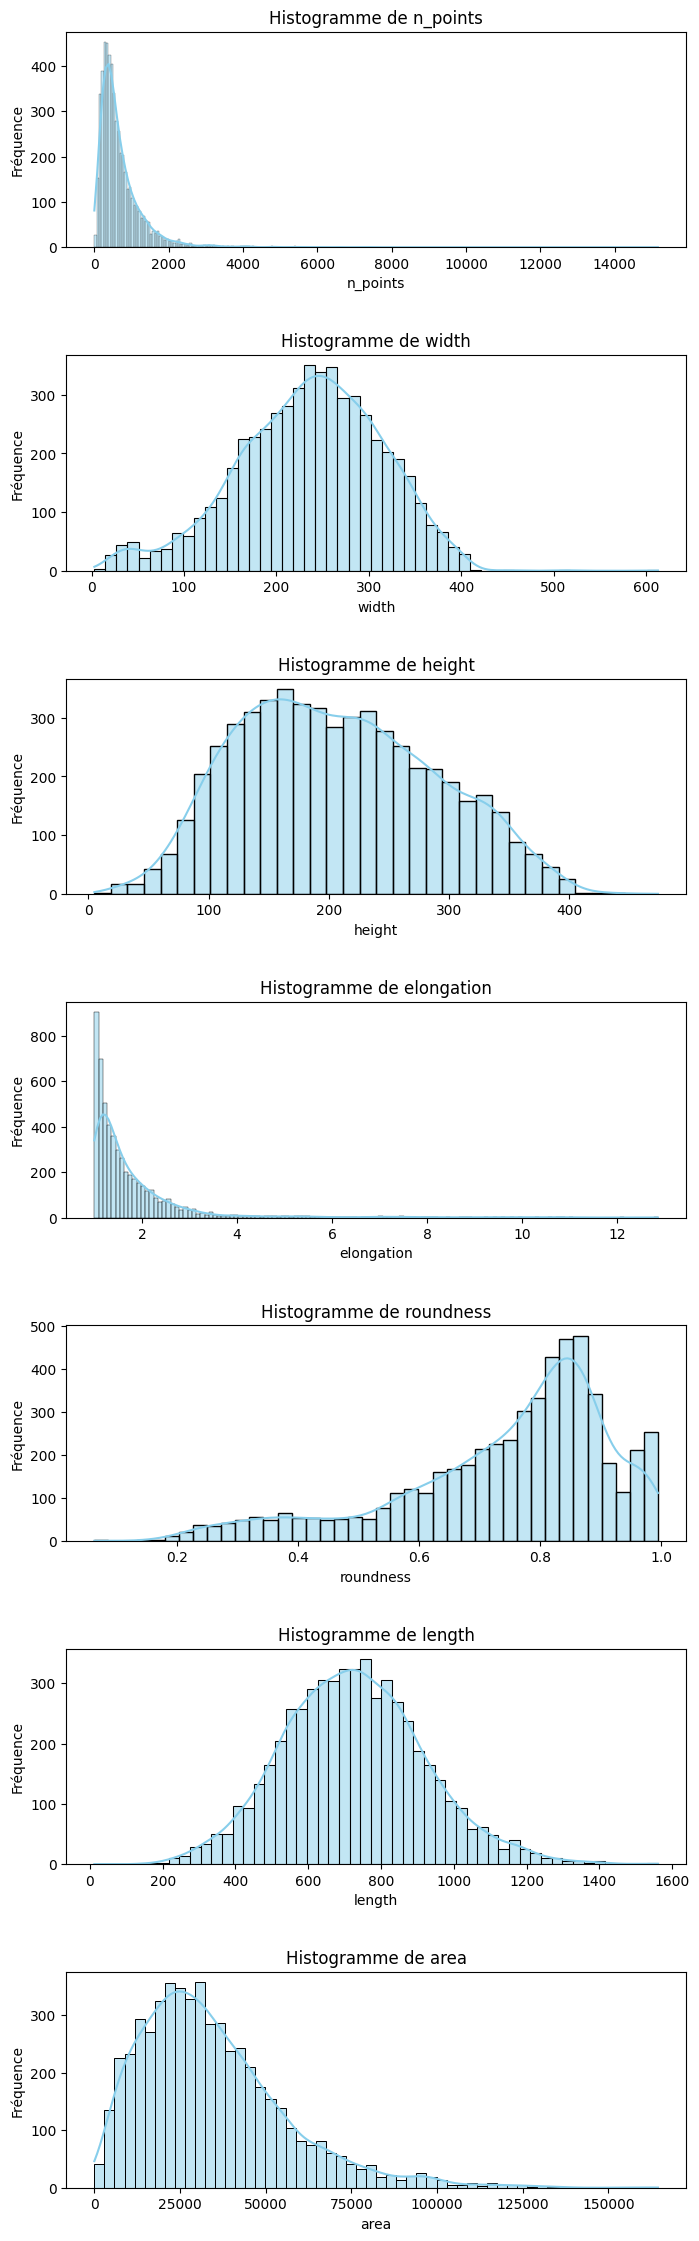

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Caractéristiques à inclure dans les histogrammes
features = ['n_points', 'width', 'height', 'elongation', 'roundness', 'length', 'area']

# Créer un sous-plots pour les histogrammes
fig, axes = plt.subplots(len(features), 1, figsize=(8, 4 * len(features)))

# Ajuster la disposition des sous-plots
fig.subplots_adjust(hspace=0.5)

# Parcourir chaque caractéristique et créer un histogramme
for i, feature in enumerate(features):
    # Créer un histogramme avec Seaborn
    sns.histplot(data=df, x=feature, kde=True, ax=axes[i], color='skyblue')
    
    # Ajouter des titres et des étiquettes
    axes[i].set_title(f'Histogramme de {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Fréquence')

plt.show()


## Modèle Restreint
Nous commencerons par construire un modèle restreint, qui est un modèle contenant uniquement deux colonnes. Cela nous aidera à avoir une première idée des performances de notre modèle.

Analyse de corrélation linéaire
La carte de corrélation fournit un aperçu de la corrélation linéaire entre les variables en visualisant les coefficients de corrélation. Le coefficient de corrélation quantifie la force et la direction d'une relation linéaire entre deux variables.

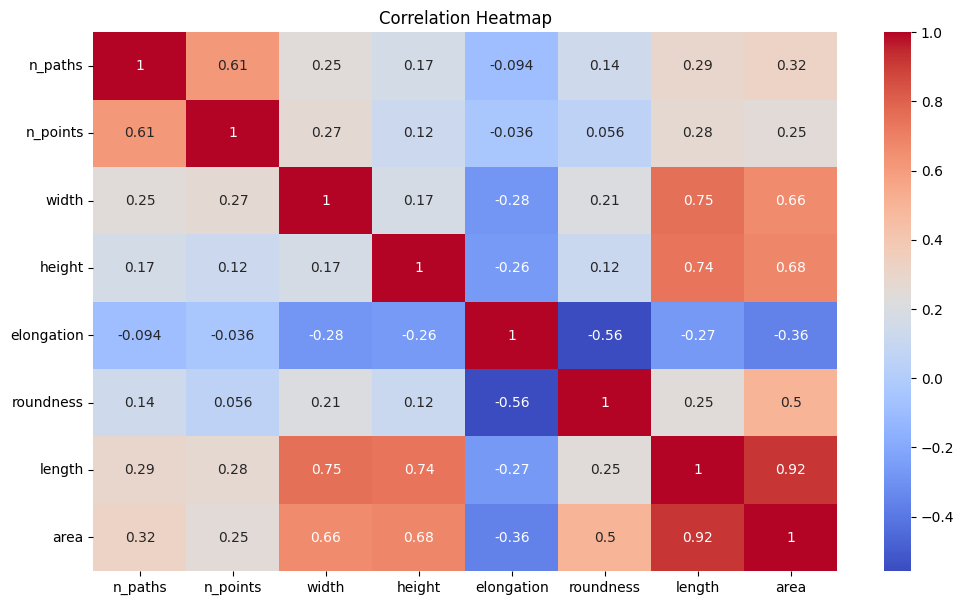

In [28]:
# Calculating correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Creating a heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Répartition des données et construction du modèle
Maintenant, on va encoder et scaler nos donner pour avoir une meilleur qualité et apres on va entrainer nos données en utilisant differents model afin d'avoir le meilleur score

In [29]:
classes = df.columns.values
X = df.drop( columns= ['class' ])
y = df['class']

In [30]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [31]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    random_state= 23,
    test_size= .15,
    stratify= y
)

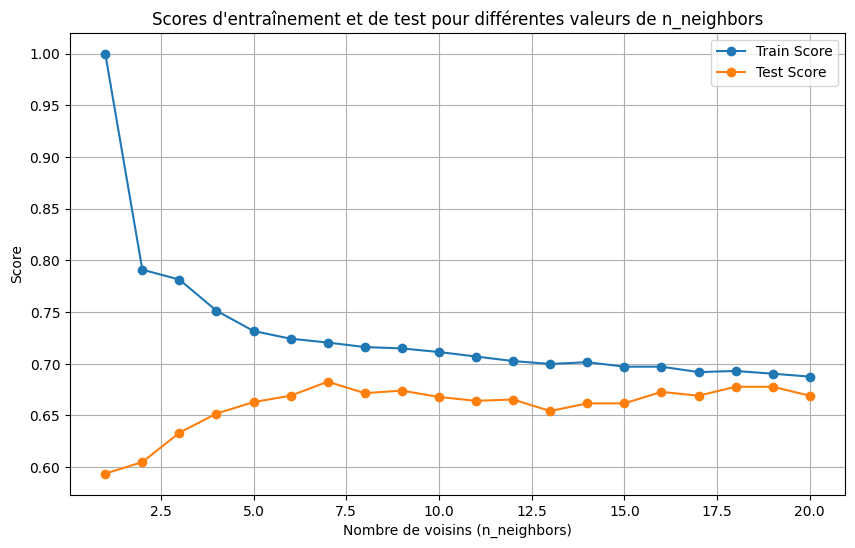

In [33]:
# Définir une plage de valeurs pour n_neighbors
neighbors_values = range(1, 21)

# Initialiser des listes pour stocker les scores d'entraînement et de test
train_scores, test_scores = [], []

# Boucle pour tester différentes valeurs de n_neighbors
for n in neighbors_values:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    
    # Stocker les scores d'entraînement et de test
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

# Créer un graphique avec Matplotlib
plt.figure(figsize=(10, 6))

# Tracer les scores d'entraînement
plt.plot(neighbors_values, train_scores, label='Train Score', marker='o')

# Tracer les scores de test
plt.plot(neighbors_values, test_scores, label='Test Score', marker='o')

# Ajouter des titres et des étiquettes
plt.title('Scores d\'entraînement et de test pour différentes valeurs de n_neighbors')
plt.xlabel('Nombre de voisins (n_neighbors)')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


In [34]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print("test_score", svm.score(X_test, y_test))
print("train_score", svm.score(X_train, y_train))


test_score 0.7037037037037037
train_score 0.7111692844677138


In [36]:
from sklearn.linear_model import LogisticRegression
import numpy as np
C = np.linspace(0.01, 100, 100)


In [37]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
param_grid = {
    'C' : C
}
grid_search = GridSearchCV(model, param_grid, cv= 5)
grid_search.fit(X, y)

c:\Users\Aymane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Aymane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+0...
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])})

In [38]:
best_model = grid_search.best_estimator_

In [39]:
best_model.score(X, y)

0.6779755283648499

In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model = SVC()
param_grid = {
    'C' : [0.001, .01, .1, 1 , 10, 100, 1000],
    'kernel' : ['linear', 'rbf', 'poly'],
    'gamma' : [.0001, .001, .01, 1, 10],
    'class_weight' : [None, 'balanced'],
    'probability' : [False, True]
}

search_grid = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X, y)

c:\Users\Aymane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Aymane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+0...
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])})

In [41]:
print(grid_search.score(X_test, y_test))
print(grid_search.score(X_train, y_train))


0.691358024691358
0.6756108202443281


c:\Users\Aymane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Aymane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

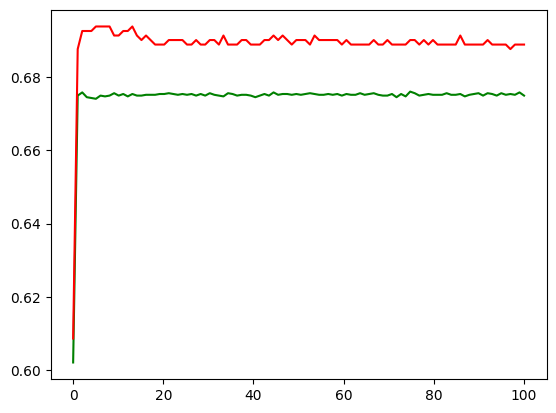

In [42]:
test_acc = []
train_acc = []
for c in C:
    lg = LogisticRegression(C=c)
    lg.fit(X_train, y_train)
    train_acc.append(lg.score(X_train, y_train))
    test_acc.append(lg.score(X_test, y_test))

from matplotlib import pyplot as plt
plt.plot(C, train_acc, c='g')
plt.plot(C, test_acc, c='r')
plt.show()

In [43]:
# Modèle de Régression Logistique
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
print("Régression Logistique Score:", model.score(X_test, y_test))

# Modèle k-Nearest Neighbors (k-NN)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print("k-NN Score:", model.score(X_test, y_test))

# Modèle SVM (Support Vector Machine)
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
print("SVM Score:", model.score(X_test, y_test))
print("SVM Score:", model.score(X_train, y_train))

# Modèle Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
print("Random Forest Score:", model.score(X_test, y_test))


c:\Users\Aymane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Régression Logistique Score: 0.6876543209876543
k-NN Score: 0.662962962962963
SVM Score: 0.7037037037037037
SVM Score: 0.7111692844677138
Random Forest Score: 0.6925925925925925


In [44]:
# Modèle de Machine à Vecteurs de Support (SVM) avec noyau linéaire
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(X_train, y_train)
print("LinearSVC Score:", model.score(X_test, y_test))

# Modèle de Machine à Vecteurs de Support (SVM) avec noyau gaussien (RBF)
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
print("SVM with RBF Kernel Score:", model.score(X_test, y_test))

# Modèle de Réseaux de Neurones Artificiels (ANN) avec scikit-learn
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(X_train, y_train)
print("Neural Network Score:", model.score(X_test, y_test))


c:\Users\Aymane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Aymane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC Score: 0.6481481481481481
SVM with RBF Kernel Score: 0.7037037037037037
Neural Network Score: 0.7074074074074074


c:\Users\Aymane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [48]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
model = MLPClassifier(random_state=61)
param_grid = {
    'random_state': np.random.randint(0,100, 10) #62
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_search.score(X_test, y_test)

c:\Users\Aymane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Aymane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Aymane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Aymane\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the 

0.7111111111111111

In [49]:
model = grid_search.best_estimator_

En fin on va enregister le modele qui possed la meilleur accuracy et le tester un peu

In [50]:
import pickle
with open(r'model\model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open(r'model\scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open(r'model\encoder.pkl', 'wb') as encoder_file:
    pickle.dump(label_encoder, encoder_file)
    

In [51]:
model.score(X_test, y_test)

0.7111111111111111

In [52]:
print(grid_search.predict(X[:10]))
print(y[:10])
print(label_encoder.inverse_transform(y[:10]))
print(label_encoder.inverse_transform(grid_search.predict(X[:10])))

[1 3 5 7 3 4 6 2 1 3]
[1 3 5 7 0 4 6 2 1 3]
['car' 'fish' 'house' 'tree' 'bicycle' 'guitar' 'pencil' 'clock' 'car'
 'fish']
['car' 'fish' 'house' 'tree' 'fish' 'guitar' 'pencil' 'clock' 'car' 'fish']


<Axes: >

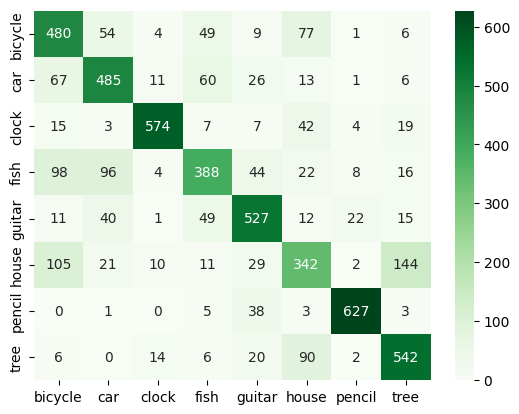

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = grid_search.predict(X)
confusion = confusion_matrix( y, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
